In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
%matplotlib inline

In [2]:
df = sns.load_dataset('tips')

print("--- Información del Dataset ---")
print(df.info())

print("\n--- Resumen Estadístico ---")
display(df.describe())

--- Información del Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None

--- Resumen Estadístico ---


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


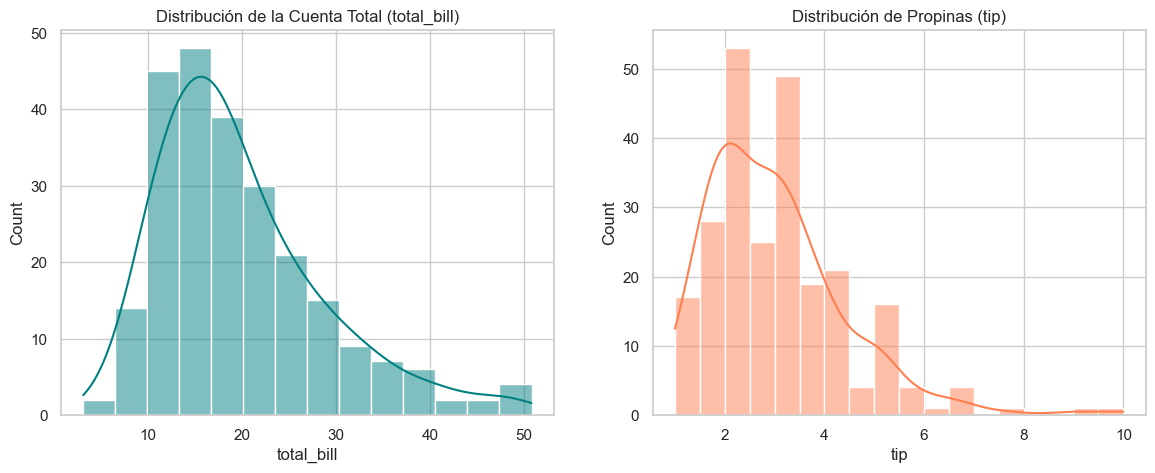

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['total_bill'], kde=True, ax=axes[0], color='teal')
axes[0].set_title('Distribución de la Cuenta Total (total_bill)')

sns.histplot(df['tip'], kde=True, ax=axes[1], color='coral')
axes[1].set_title('Distribución de Propinas (tip)')

plt.show()

C:\Users\matas\AppData\Local\Temp\ipykernel_18308\576373496.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='day', palette='viridis', order=['Thur', 'Fri', 'Sat', 'Sun'])


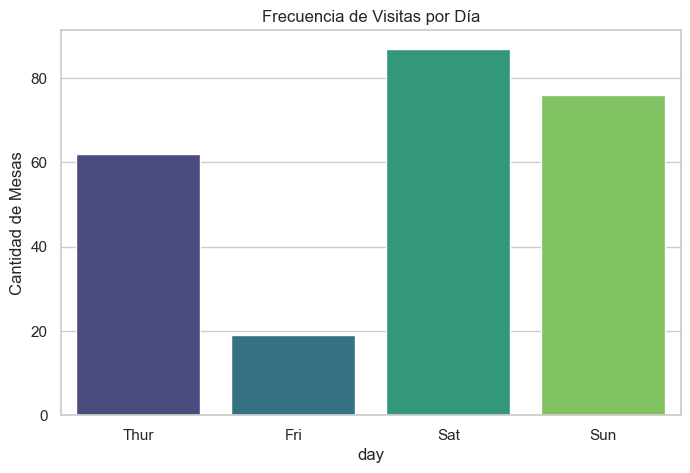

In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='day', palette='viridis', order=['Thur', 'Fri', 'Sat', 'Sun'])
plt.title('Frecuencia de Visitas por Día')
plt.ylabel('Cantidad de Mesas')
plt.show()

In [7]:
Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)
IQR = Q3 - Q1

limite_superior = Q3 + 1.5 * IQR

outliers = df[df['tip'] > limite_superior]

print(f"Rango Intercuartílico (IQR): {IQR:.2f}")
print(f"Límite superior para outliers: {limite_superior:.2f}")
print(f"Número de propinas atípicas: {len(outliers)}")

Rango Intercuartílico (IQR): 1.56
Límite superior para outliers: 5.91
Número de propinas atípicas: 9


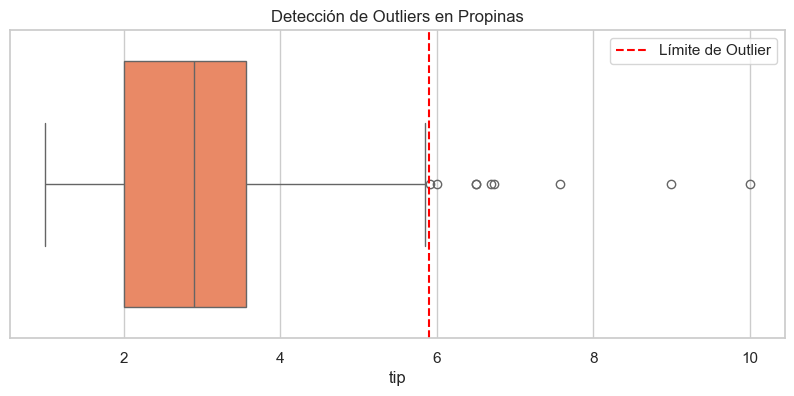

In [8]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['tip'], color='coral')
plt.axvline(limite_superior, color='red', linestyle='--', label='Límite de Outlier')
plt.title('Detección de Outliers en Propinas')
plt.legend()
plt.show()

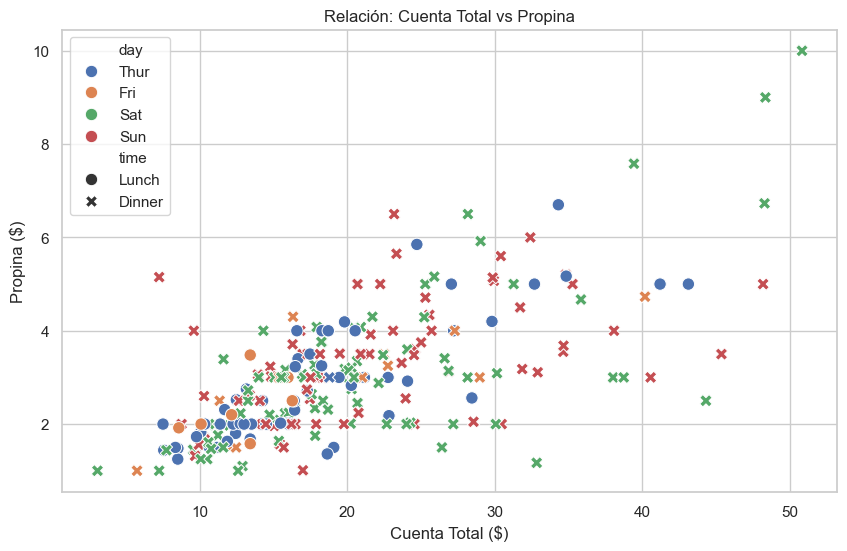

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_bill', y='tip', hue='day', style='time', s=80)
plt.title('Relación: Cuenta Total vs Propina')
plt.xlabel('Cuenta Total ($)')
plt.ylabel('Propina ($)')
plt.show()

5. Conclusiones
Hallazgos principales:
Distribución de Gastos: La mayoría de las cuentas se concentran entre los 13 y 25 USD. Tanto la cuenta total como las propinas presentan una asimetría hacia la derecha (sesgo positivo).

Outliers en Propinas: Se detectaron propinas superiores a $5.91 como valores atípicos. Estos representan clientes excepcionalmente generosos o eventos especiales.

Decisión: No se eliminan, ya que son datos reales que ayudan a entender el potencial máximo de ingresos por propina.

Días de mayor actividad: El Sábado es el día con más concurrencia, seguido del Domingo, lo que sugiere que el negocio depende fuertemente del flujo de fin de semana.

Correlación: Existe una relación lineal positiva clara: a mayor cuenta total, mayor es la propina, aunque la variabilidad aumenta en cuentas superiores a 40 USD.